# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [28]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [29]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [30]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [32]:
# Fetch current BTC price
import json
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
#print(json.dumps(btc_data,indent=4))
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url).json()
#print(json.dumps(eth_data,indent=4))
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $14359.00
The current value of your 5.3 ETH is $1973.24


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [33]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [35]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [36]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                     SPY  \
                            open    high     low  close   volume    open   
2020-10-20 00:00:00-04:00  117.7  117.71  117.59  117.7  1774803  343.46   

                                                             
                             high     low   close    volume  
2020-10-20 00:00:00-04:00  345.28  342.64  343.96  15154194

In [39]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.7
Current SPY closing price: $343.96


In [40]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17198.00
The current value of your 200 AGG shares is $23540.00


### Savings Health Analysis

In [59]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame([["crypto",my_btc_value + my_eth_value],
                           ["shares",my_spy_value + my_agg_value]],columns=["","amount"])
df_savings.set_index("",inplace=True)

# Display savings DataFrame
display(df_savings)

,amount
,
crypto,16332.239
shares,40738.000


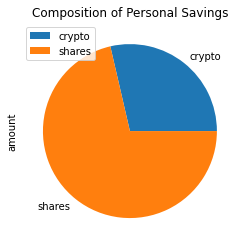

In [54]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount",title="Composition of Personal Savings")

In [63]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings["amount"].sum())

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congrats on having enough money in this fund!")
if total_savings == emergency_fund:
    print("Congrats on reaching this financial goal!")
if total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings:0.2f} away from the goal.")

Congrats on having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [64]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [66]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

AGG                                           SPY          \
              open      high      low   close     volume    open    high   
2015-08-07  109.14  109.2750  109.035  109.21  2041167.0  208.16  208.34   
2015-08-10  109.15  109.1700  108.920  109.06  1149778.0  209.28  210.67   
2015-08-11  109.42  109.5765  109.284  109.42  1420907.0  208.98  209.47   
2015-08-12  109.55  109.7100  109.350  109.36  1468979.0  207.11  209.14   
2015-08-13  109.36  109.3651  109.110  109.15  1465173.0  208.73  209.55   

                                       
               low   close     volume  
2015-08-07  206.87  207.93   87669782  
2015-08-10  209.28  210.58   66755890  
2015-08-11  207.76  208.63   88424557  
2015-08-12  205.36  208.89  136171450  
2015-08-13  208.01  208.63   77197796

In [69]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [70]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                                        SPY  \
              open      high      low   close     volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167.0          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778.0    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907.0     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979.0    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173.0    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

In [71]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010466,1.000448,1.007805,0.994415,0.993530,0.998237,1.001309,0.999323,0.998661,0.997847,...,1.003857,0.994277,0.999799,0.997011,1.003375,1.000085,1.000053,0.998506,0.996912,1.009259
2,1.003575,1.009799,1.011627,0.990744,0.987629,0.998331,0.995419,1.002165,0.993532,1.006734,...,1.005449,0.994562,0.991465,0.991936,1.003968,1.005475,1.000486,0.995423,0.991918,1.007817
3,1.001154,1.005153,1.011072,0.987841,0.985732,0.999315,0.996855,1.000221,0.990988,1.002472,...,1.008323,0.995463,0.990649,0.986196,0.993450,1.004949,1.004633,0.993152,1.001822,1.015966
4,1.004483,0.996519,1.006407,0.993898,0.990311,0.999313,0.990547,0.993783,0.993250,1.004991,...,1.014744,0.988605,0.992538,0.985971,0.989201,1.005556,1.001967,0.992818,1.006606,1.020400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.900629,4.643344,2.809029,4.757433,3.720377,3.657287,5.001657,4.017008,1.678777,3.975723,...,11.071603,2.125410,5.004361,2.647344,6.170532,4.758618,5.896858,4.602741,10.353870,4.733785
7557,5.867464,4.646777,2.805320,4.744856,3.697122,3.672926,4.978703,4.023960,1.674485,3.982610,...,11.156327,2.116377,5.042397,2.650086,6.200415,4.758679,5.885480,4.613650,10.386310,4.717757
7558,5.819499,4.615066,2.779622,4.743117,3.680339,3.660886,4.966718,4.002843,1.683871,3.989804,...,11.173195,2.112115,5.084454,2.628490,6.170747,4.743139,5.894385,4.630459,10.353897,4.658735
7559,5.819786,4.565088,2.803579,4.713832,3.690326,3.650722,4.999746,3.978882,1.688618,3.958537,...,11.172345,2.112200,5.079372,2.632905,6.175355,4.711540,5.873886,4.602255,10.330447,4.633671


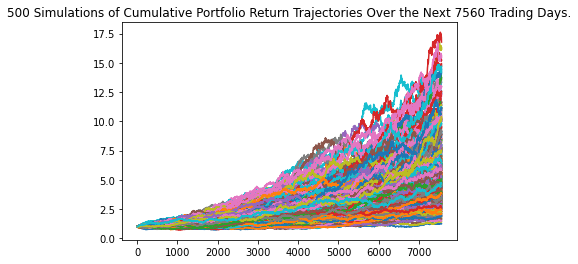

In [72]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()

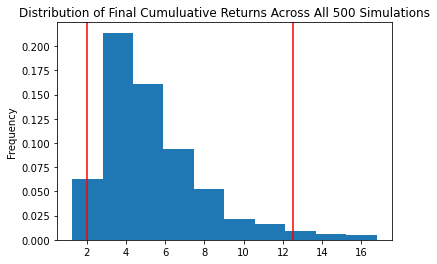

In [73]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              5.370766
std               2.652512
min               1.253752
25%               3.596375
50%               4.723603
75%               6.536134
max              16.776523
95% CI Lower      2.029024
95% CI Upper     12.499596
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [75]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $40580.48 and $249991.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [76]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $60870.72 and $374987.89


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [78]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                                        SPY  \
              open      high      low   close     volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167.0          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778.0    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907.0     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979.0    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173.0    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

In [79]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005839,0.994980,1.003329,1.004574,1.004786,1.000769,1.003434,1.002363,0.994217,1.001311,...,1.000870,1.002092,0.991317,1.004131,0.999396,1.006165,1.006359,0.996775,1.001279,0.996905
2,1.010336,0.994290,1.007548,1.010347,0.998388,0.994655,1.001815,0.992702,0.998497,1.006184,...,0.996516,1.003962,0.993999,1.009956,0.998911,1.001730,1.010410,0.993349,0.999317,0.990766
3,1.014270,0.994119,1.003441,1.018759,0.992065,0.995396,1.007130,1.003406,0.993736,1.001314,...,0.996231,1.012709,0.993211,1.006188,1.001053,0.994591,1.020136,1.003270,0.998269,0.988614
4,1.003451,0.992422,1.007200,1.016232,0.993902,0.986752,1.015730,1.001249,0.992607,1.005184,...,0.995745,1.013602,0.999972,0.996565,1.004852,0.989615,1.012628,0.997247,0.998820,0.989766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.180332,1.534092,1.404448,1.803347,1.129396,1.115482,1.824262,1.485521,1.139389,1.099788,...,1.143102,1.152700,1.568333,1.434901,1.506457,1.121354,1.036549,1.264793,0.970755,1.025682
1257,1.179770,1.522346,1.408329,1.818907,1.122714,1.121021,1.827062,1.488765,1.140621,1.094650,...,1.138690,1.142400,1.565252,1.436802,1.488570,1.124614,1.042198,1.252031,0.962387,1.025619
1258,1.185187,1.499669,1.399694,1.829895,1.121693,1.119529,1.838645,1.488112,1.148409,1.106061,...,1.142985,1.143175,1.572271,1.439938,1.499445,1.131402,1.041274,1.242674,0.962873,1.013729
1259,1.190510,1.512548,1.395544,1.839218,1.130422,1.123821,1.853014,1.510747,1.147128,1.107185,...,1.145743,1.137864,1.575038,1.453782,1.492655,1.127293,1.030366,1.243571,0.962054,1.009503


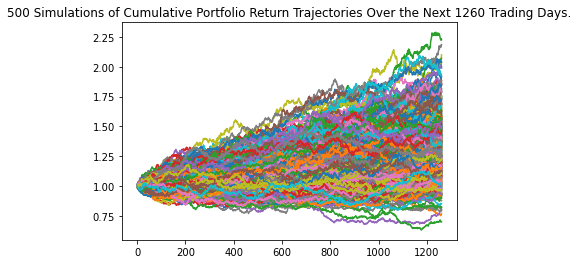

In [80]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyear.plot_simulation()

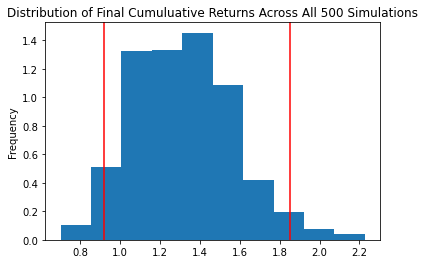

In [81]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_fiveyear.plot_distribution()

In [82]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.322586
std               0.252742
min               0.701273
25%               1.128915
50%               1.311026
75%               1.480117
max               2.227452
95% CI Lower      0.920130
95% CI Upper      1.854327
Name: 1260, dtype: float64


In [84]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55207.81 and $111259.64


### Ten Years Retirement Option

In [85]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head()

AGG                                                        SPY  \
              open      high      low   close     volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167.0          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778.0    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907.0     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979.0    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173.0    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

In [86]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005489,0.994618,1.005033,0.996532,1.001776,0.996728,1.003315,1.006821,1.005126,0.999370,...,1.008913,0.997255,0.994550,1.002232,0.997826,0.997321,1.009911,0.999694,1.003306,1.005278
2,1.007524,0.990312,1.001223,0.983586,1.003373,0.988764,1.002558,1.001044,1.001787,1.004775,...,1.007441,1.009270,0.996546,1.000480,0.991410,0.988563,1.007790,1.000382,1.010752,1.001585
3,1.010316,0.990076,0.998235,0.985658,1.004082,0.984966,1.000975,1.002036,1.008398,1.001824,...,1.000009,1.017359,0.997974,1.002134,1.001585,0.990910,1.009819,1.003962,1.013886,1.006459
4,1.012331,0.982112,1.002120,0.981046,1.013601,0.985962,1.006820,0.993888,1.005001,1.005275,...,0.997247,1.018371,0.995898,1.002291,0.998769,0.992777,1.006108,1.006789,1.015696,1.007179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.386565,1.426849,1.717191,1.782582,2.042074,1.126771,1.330220,2.324908,1.583078,1.329024,...,1.292506,1.348709,1.792825,1.207207,1.203455,0.986570,1.996598,1.819997,1.927060,1.892579
2517,1.398837,1.430884,1.702420,1.770512,2.028120,1.127639,1.323824,2.351252,1.591997,1.336822,...,1.294913,1.354071,1.796502,1.209281,1.211175,0.982523,1.998067,1.827905,1.924646,1.866262
2518,1.401888,1.433715,1.693746,1.761765,2.034898,1.119142,1.327281,2.360224,1.574972,1.350560,...,1.302406,1.350816,1.790432,1.209725,1.211509,0.995064,2.007103,1.815820,1.924740,1.878124
2519,1.388703,1.439430,1.699497,1.763715,2.040497,1.114783,1.333679,2.358867,1.578604,1.364383,...,1.302827,1.346179,1.787497,1.204833,1.215314,0.997481,2.001333,1.816654,1.920842,1.875506


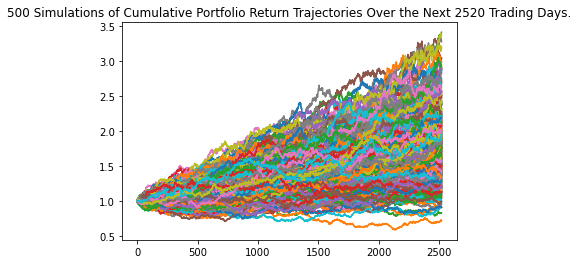

In [87]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_tenyear.plot_simulation()

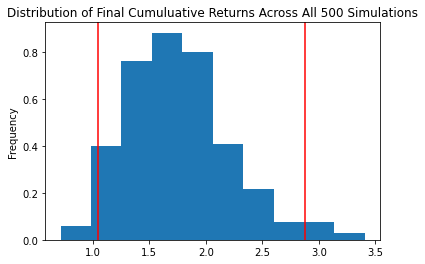

In [89]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_tenyear.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.753444
std               0.454040
min               0.714594
25%               1.427738
50%               1.722436
75%               1.990357
max               3.406666
95% CI Lower      1.046170
95% CI Upper      2.876624
Name: 2520, dtype: float64


In [91]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62770.21 and $172597.46
